In [25]:
import cv2
import numpy as np

img=cv2.imread('data/photo.jpg')

u = []
v = []
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: 
        print(f"({x},{y})")
        u.append(x)
        v.append(y)
        str_xy = '(x:'+ str(x) + ',y:'+ str(y) + ')'
        cv2.circle(img, (x, y), 1, (255, 0, 0), thickness = -1)
        cv2.putText(img, str_xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    2.0, (255,255,255), thickness = 3)
        cv2.imshow("image", img)
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
while(1):
    cv2.imshow("image", img)
    if cv2.waitKey(0)&0xFF==27:
        break
cv2.destroyAllWindows()

(140,152)
(280,288)
(399,400)
(501,500)
(589,583)
(669,653)
(740,718)
(802,778)
(857,828)


In [6]:
points="""(0,0)->(167,87),
(1,3)->(234.54, 309.16), 
(1,4)->(235.09, 387.09), 
(1,5)->(235.46, 465.16), 
(1,6)->(235.47, 543.64),
(2,3)->(302.49, 301.95), 
(2,4)->(303.18, 381.81), 
(2,5)->(303.54, 461.66), 
(2,6)->(303.85, 541.92), 
(3,3)->(373.73, 294.38), 
(3,4)->(374.32, 376.11), 
(3,5)->(374.84, 457.74), 
(3,6)->(375.51, 540.15), 
(4,3)->(448.75, 285.84), 
(4,4)->(449.46, 369.88), 
(4,5)->(450.03, 453.83), 
(4,6)->(451.00, 538.43), 
(5,3)->(528.43, 276.56), 
(5,4)->(528.93, 363.13), 
(5,5)->(529.84, 449.63), 
(5,6)->(531.21, 536.74), 
(6,3)->(613.02, 266.49),
(6,4)->(613.86, 355.74),
(6,5)->(615.02, 445.03),
(6,6)->(616.79, 535.13)"""
a = points.replace("->",":")
a.replace("\n","")

'(0,0):(167,87),(1,3):(234.54, 309.16), (1,4):(235.09, 387.09), (1,5):(235.46, 465.16), (1,6):(235.47, 543.64),(2,3):(302.49, 301.95), (2,4):(303.18, 381.81), (2,5):(303.54, 461.66), (2,6):(303.85, 541.92), (3,3):(373.73, 294.38), (3,4):(374.32, 376.11), (3,5):(374.84, 457.74), (3,6):(375.51, 540.15), (4,3):(448.75, 285.84), (4,4):(449.46, 369.88), (4,5):(450.03, 453.83), (4,6):(451.00, 538.43), (5,3):(528.43, 276.56), (5,4):(528.93, 363.13), (5,5):(529.84, 449.63), (5,6):(531.21, 536.74), (6,3):(613.02, 266.49),(6,4):(613.86, 355.74),(6,5):(615.02, 445.03),(6,6):(616.79, 535.13)'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
point_dict = {
(0,0):(167,87),(1,3):(234.54, 309.16), (1,4):(235.09, 387.09), (1,5):(235.46, 465.16), (1,6):(235.47, 543.64),(2,3):(302.49, 301.95), (2,4):(303.18, 381.81), (2,5):(303.54, 461.66), (2,6):(303.85, 541.92), (3,3):(373.73, 294.38), (3,4):(374.32, 376.11), (3,5):(374.84, 457.74), (3,6):(375.51, 540.15), (4,3):(448.75, 285.84), (4,4):(449.46, 369.88), (4,5):(450.03, 453.83), (4,6):(451.00, 538.43), (5,3):(528.43, 276.56), (5,4):(528.93, 363.13), (5,5):(529.84, 449.63), (5,6):(531.21, 536.74), (6,3):(613.02, 266.49),(6,4):(613.86, 355.74),(6,5):(615.02, 445.03),(6,6):(616.79, 535.13)
}

In [3]:
X,y = [],[]
for k,v in point_dict.items():
    X.append(k)
    y.append(v)


In [4]:
X = np.array(X)
y = np.array(y)

回归截距: w0=[157.73427313  70.969163  ]
回归系数: w1=[[75.30485651 -0.6815257 ]
 [-5.92682756 80.99837445]]
R2 确定系数：0.9976
均方误差：35.6643
平均绝对值误差：4.7856
中位绝对值误差：4.2935


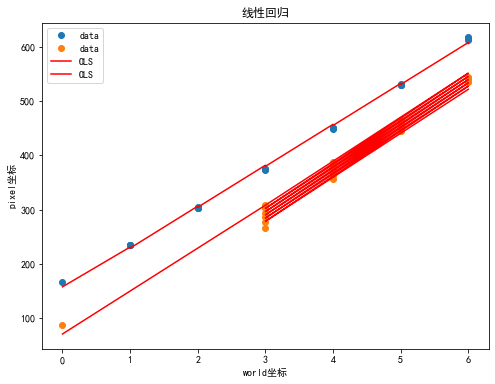

In [13]:
modelRegL = LinearRegression()  # 创建线性回归模型
modelRegL.fit(X, y)  # 模型训练：数据拟合
yFit = modelRegL.predict(X)  # 用回归模型来预测输出

# 输出回归结果
print('回归截距: w0={}'.format(modelRegL.intercept_))  # w0: 截距
print('回归系数: w1={}'.format(modelRegL.coef_))  # w1,..wm: 回归系数

# 回归模型的评价指标
print('R2 确定系数：{:.4f}'.format(modelRegL.score(X, y)))  # R2 判定系数
print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差

# 绘图：原始数据点，拟合曲线
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, y, 'o', label="data")  # 原始数据
ax.plot(X, yFit, 'r-', label="OLS")  # 拟合数据

ax.legend(loc='best')  # 显示图例
plt.xlabel("world坐标")
plt.ylabel("pixel坐标")
plt.title('线性回归')
plt.savefig("世界-像素坐标线性回归.png")
plt.show()

回归截距: w0=[157.43041137  71.99997628]
回归系数: w1=[[75.36544102 -0.7598223 ]
 [-6.12741282 81.0728366 ]]


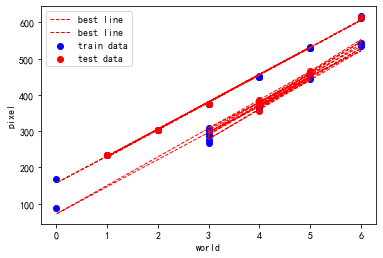

0.9942705465225823

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
model = LinearRegression()
model.fit(X_train,y_train)
print('回归截距: w0={}'.format(model.intercept_))  # w0: 截距
print('回归系数: w1={}'.format(model.coef_))  # w1,..wm: 回归系数

y_train_pred=model.predict(X_train)
plt.scatter(X_train,y_train,color='blue',label='train data')
plt.scatter(X_test,y_test,color='red',label='test data')
plt.plot(X_train,y_train_pred,'r--',linewidth=1,label='best line')
plt.legend(loc=2)
plt.xlabel("world")
plt.ylabel("pixel")
plt.show()

model.score(X_test,y_test)

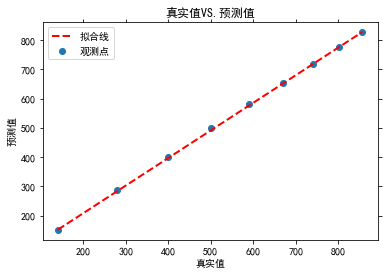

In [27]:
import matplotlib.pyplot as plt
# 散点图
plt.scatter(X, y, label = '观测点')
# 回归线
plt.plot([X.min(), U.max()], [V.min(), V.max()], 'r--', lw=2, label = '拟合线')
# 添加轴标签和标题
plt.title('真实值VS.预测值')
plt.xlabel('真实值')
plt.ylabel('预测值')
 
# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')
# 添加图例
plt.legend(loc = 'upper left')
plt.show()
